3층 신경망

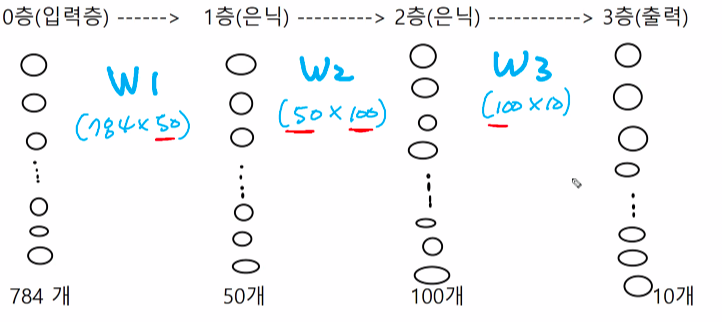

신경망을 학습시키기 위해 알아야 하는 내용

1. 오차함수: 신경망이 뭘 잘못하고 있는지 깨닫게 해주는 함수
2. 미니 배치: 학습할 때 한꺼번에 신경망에 넣는게 아니라 몇백장씩 조금씩 신경망에 넣고 학습시키는 것을 말함
3. 수치 미분: 오차함수의 기울기를 구해서 기울기 만큼 가중치를 갱신해주는 역할을 할 때 필요

# 오차함수

시그모이드 함수, 렐루 함수, 소프트 맥스 함수, 오차 함수

- 예상값과 실제값과의 오차를 신경망에 역전파 시켜주기 위해서 필요한 함수
- 신경망의 잘못을 깨닫게 해주는 함수

1. 평균 제곱 오차 함수( mean squared error ): 회귀 분석 시 사용
2. 교차 엔트로피 오차 함수( cross entropy error ): 분류 문제를 풀때 사용

## 평균 제곱 오차함수

$$ E = \frac{1}{2} \sum_k(y_k - t_k)^2 $$

In [8]:
import numpy as np

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 예측 숫자
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 숫자


def mean_squared_error( y, t ):
    return 0.5 * np.sum((np.array(y)-np.array(t))**2)

print(mean_squared_error(y, t))

0.09750000000000003


문제 69. 숫자 7로 예측한 결과와 정답 숫자 2와의 오차를 구하시오

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 예측 숫자
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 숫자

def mean_squared_error( y, t ):
    return 0.5 * np.sum((np.array(y)-np.array(t))**2)

print(mean_squared_error(y, t)) # 0.5975
# 설명: 위의 오차 0.59는 오차가 작아서 분류문제를 해결하기 위해서는 더 큰 오차로 응답 해주어야 한다.그래서 필요한 함수가 바로 교차 엔트로피 함수.

0.5975


## 교차 엔트로피 함수

$$E = - \sum_kt_k\log{y_k}$$

In [10]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 예측 숫자
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 숫자

def cross_entropy_error(y, t):
    return - np.sum(t*np.log(y))

print(cross_entropy_error(y, t))

# 결과 = nan, ㅣog함수에 숫자 0이 들어갔기 때문에
# log 0 은 마이너스 무한대로 발산한다.

nan


<ipython-input-10-a0a70274a024>:5: RuntimeWarning: divide by zero encountered in log
  return - np.sum(t*np.log(y))
<ipython-input-10-a0a70274a024>:5: RuntimeWarning: invalid value encountered in multiply
  return - np.sum(t*np.log(y))


In [11]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 예측 숫자
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 숫자

def cross_entropy_error(y, t):
    delta = 1e-7  # 0.0000001 마이너스 무한대가 되지 않게 아주 작은 값을 더한다.
    return - np.sum(t * np.log(y + delta))

print(cross_entropy_error(np.array(y), np.array(t)))

# 평균 제곱 오차 함수는 오차가 0.59인데 교차 엔트로피 오차 함수는 오차가 2.3으로 훨씬 큰 오차를 출력함.
# 분류문제를 풀 때는 교차 엔트로피 오차 함수를 사용해야 함

2.302584092994546


# 미니 배치 학습
"훈련 데이터 중에 일부만 골라서 학습하는 방법"  
"표본을 뽑아서 학습시킨다"  

<br>

3장에서는 저자가 만들어온 가중치를 인경신경망에 셋팅해서 필기체 분류 신경망을 구현을 했다면 4장은 우리가 직접 신경망을 학습 시키는 것이 목표  

<br>

6만장 ---------------------------> 신경망 ( 컴퓨터가 터져 버린다 )  
6만장 중에 1장씩 입력 -------> 신경망 ( 시간이 많이 걸림 )  
6만장 중에 100씩 입력 -------> 신경망 ( 학습시간을 빠르게 하기 위해서 )

(100, 784 ) $\odot$ ( 784, 50 ) = (100, 50 )  
(100, 50 )  $\odot$ ( 50, 100 ) = (100, 100)  
(100, 100) $ \odot$ ( 100, 10 ) = (100, 10 )

<br>

100장을 추출할 때 복원추출, 비복원추출 할 것이가는 크게 중요하지 않고 결국 여러번 반복해서 학습하다 보면 학습이 된다.  
100장씩 600번 돌리는 것이 1 epoch

<br>

문제 70. 숫자 1 ~ 60000의 숫자 중에서 무작위로 10개를 출력하시오  

In [12]:
import numpy as np

np.random.choice( np.arange(60001), 10)

array([16888, 52625, 23904, 43149, 34666,  3614, 18778, 44406,  8302,
       42317])

문제 70. 숫자 1 ~ 60000의 숫자 중에서 100개를 랜덤 추출하시오

In [13]:
import numpy as np

np.random.choice( np.arange(60001), 100)

array([24416, 55819, 39965, 20743, 19996, 35175, 40805, 23142, 37858,
       16637, 51117, 22073,   140, 52376, 42793, 37846, 29982, 22864,
       57009, 40017, 29731,  4435, 39608, 48224, 56579, 31121, 30658,
       42797, 16875, 49015, 53190,  3901, 17032, 59696, 25971, 34720,
       30125, 36312, 12201, 39514, 16484, 57961, 40111, 31260,  5978,
       41939, 12258,  1623, 47283, 40620, 18912, 57112, 27645, 43016,
       38372, 28451, 44130, 53516, 19609, 25308, 56661, 11549, 44774,
       51886,  4950,  6747,  3709, 32861, 33801, 41002, 24870, 50446,
       45380, 59108, 30531, 26137, 59786, 21137, 14272, 21388, 21444,
       33272,  2039, 48980, 41833, 37872, 31817,  6884, 17417, 59842,
       15467, 56793, 42566, 54427,  4642, 27876, 30659, 38551, 40996,
       56394])

문제 72. 3장에서 마지막으로 작성한 필기체 숫자 예측하는 전체 코드를 가져와서 100개를 랜덤추출하여 예측하게 할 수 있도록 코드를 수정하시오

In [36]:
import numpy as np
import pickle
from common7.functions import *
from  dataset.mnist  import  load_mnist 

class Three_Nn():
    import numpy as np
    import pickle
    from  dataset.mnist  import  load_mnist 
    
    #  1. 데이터를 불러옵니다. ( 얀르쿤 교수님이 만든 필기체 데이터)
    def get_data(self):
        (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True,  one_hot_label=False) 
        return  x_train, t_train 

    def predict(self, network, x):
    # 2. 가중치와 바이어스 값을 불러옵니다. (저자가 미리 학습 시킨 가중치와 바이어스)
        # network = init_network()
        w1, w2, w3 = network['W1'], network['W2'], network['W3']
        b1, b2, b3 = network['b1'], network['b2'], network['b3']

        # 3. 신경망을 구성합니다. 
        # 0층
        # x = x_train[0:100]  # 일단 10개의 필기체 데이터를 구성합니다. 

        # 1층
        y = np.dot(x,w1) + b1
        y_hat = sigmoid(y)

        # 2층
        z = np.dot(y_hat, w2) + b2
        z_hat = sigmoid(z)

        # 3층
        k = np.dot(z_hat, w3) + b3
        k_hat =  softmax(k)
        return k_hat

n1 = Three_Nn() # 객체화시킨다 설계도 가지고 제품을 만든다.

x,t = n1.get_data() # 테스트 데이터와 테스트 데이터의 정답을 불러오는 코드
network = init_network() # 저자가 만들어온 가중치와 바이어스를 불러오는 코드
a = []
batch_size = 100
accuracy_cnt = 0

for i in range( 0, len(x), batch_size ):    # 0, 100, 200, 300, 400, ...
    batch_mask = np.random.choice(60000, 100)
    y = n1.predict( network, x[batch_mask] ) # x[0:100], x[100:200]
    y_hat = np.argmax(y, axis=1)   # 100개의 예측 숫자들이 출력됨
    a.append( sum(y_hat == t[batch_mask]) / 100) # 에측 100개와 정답 100개를 비교해서 정확도를 계산
print( a )  # 600개의 정확도가 들어있다.

[0.96, 0.9, 0.95, 0.92, 0.9, 0.97, 0.96, 0.92, 0.98, 0.93, 0.96, 0.92, 0.95, 0.93, 0.95, 0.94, 0.95, 0.95, 0.94, 0.91, 0.91, 0.94, 0.96, 0.92, 0.93, 0.94, 0.94, 0.96, 0.87, 0.94, 0.91, 0.96, 0.92, 0.97, 0.94, 0.91, 0.96, 0.96, 0.98, 0.92, 0.96, 0.93, 0.93, 0.96, 0.9, 0.94, 0.9, 0.95, 0.92, 0.92, 0.91, 0.91, 0.96, 0.94, 0.94, 0.94, 0.95, 0.96, 0.95, 0.93, 0.95, 0.97, 0.94, 0.92, 0.9, 0.94, 0.95, 0.93, 0.94, 0.96, 0.96, 0.93, 0.91, 0.92, 0.94, 0.92, 0.94, 0.95, 0.92, 0.95, 0.93, 0.92, 0.94, 0.95, 0.93, 0.94, 0.92, 0.9, 0.95, 0.9, 0.95, 0.93, 0.91, 0.95, 0.93, 0.95, 0.92, 0.92, 0.93, 0.91, 0.95, 0.94, 0.94, 0.98, 0.91, 0.89, 0.9, 0.91, 0.88, 0.96, 0.97, 0.9, 0.92, 0.98, 0.99, 0.88, 0.95, 0.92, 0.97, 0.86, 0.96, 0.98, 0.97, 0.96, 0.95, 0.95, 0.89, 0.93, 0.9, 0.97, 0.92, 0.92, 0.96, 0.95, 0.93, 0.93, 0.93, 0.96, 0.93, 0.97, 0.96, 0.9, 0.9, 0.95, 0.97, 0.94, 0.93, 0.93, 0.92, 0.98, 0.93, 0.98, 0.96, 0.93, 0.99, 0.86, 0.92, 0.92, 0.96, 0.93, 0.95, 0.96, 0.91, 0.97, 0.97, 0.92, 0.96, 0.97, 0.9

# 수치 미분

신경망을 학습 시킬때 가중치를 갱신해주기 위해서 미분이 필요함 ( 가중치 = 가중치 - 기울기 )  

<br>

$$\frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$$

In [15]:
def numerical_diff(f, x):
    h = 10e-50  # 0에 가까워지는 숫자르 ㄹ표현
    return ( f(x+h)-f(x) )/h

def f(x):
    return 2 * x ** 2 + 2

print( numerical_diff(f, 4) )
# 정확한 미분은 컴퓨터로 구현할 수가 없다.
# 컴퓨터로 구현하면 분모가 0이 되어버려서 계산이 되지 않는다.

0.0


도함수 공식: 

$$\lim_{h \to 0} \frac {f(x+h)-f(x-h)}{(x + h) - (x - h)} = \lim_{h \to 0} \frac {f(x+h)-f(x-h)}{2 \times h}  $$

In [16]:
def numerical_diff(f, x):
    h = 0.0001 # 극한값을 구현
    return ( f(x+h)-f(x-h) )/(2*h)

def f(x):
    return 2 * x ** 2 + 2

print( numerical_diff(f, 4) )
# 정확한 미분은 컴퓨터로 구현할 수가 없다.
# 컴퓨터로 구현하면 분모가 0이 되어버려서 계산이 되지 않는다.

15.999999999998238


문제 73. 위에서 만든 미분 함수를 이용해서 아래의 함수를 미분해서 기울기를 구해서 x = 6일때의 미분계수를 구하시오  
$$f(x) = 3 x^4 + 2x^3 + 6x^2 + 7$$

In [17]:
def numerical_diff(f, x):
    h = 0.0001 # 극한값을 구현
    return ( f(x+h)-f(x-h) )/(2*h)

def f(x):
    return 3 * x ** 4 + 2 * x **3 + 6 * x ** 2 + 7

print( numerical_diff(f, 6) )
# 정확한 미분은 컴퓨터로 구현할 수가 없다.
# 컴퓨터로 구현하면 분모가 0이 되어버려서 계산이 되지 않는다.

2880.0000007368


## 편미분

변수가 2개 이상인 함수를 미분할 때 미분 대상 변수외에 나머지 변수를 상수처럼 고정시켜 미분하는 것을 편미분이라고 함  
<br>
w1 = w1 -기울기 ----> 기울기가 0이 될때까지 계속 w1 갱신  
w2 = w2 -기울기 ----> 기울기가 0이 될때까지 계속 w2 갱신  
<br>
가중치를 w1만 갱신하면 안되고 w2도 갱신해줘야 하고 w3도 갱신해줘야 하기 때문에 편미분이 딥러닝에서 필요  
<br>
문제 74. 아래의 수학식을 손으로 편미분해서 $x_1$ = 4일 때와 $x_2=3$일 때의 기울기를 구하시오  
$$f = 2x_{1}^{2} + 3x_2^2 + 4$$  
${\operatorname{d}\!f\over\operatorname{d}\!x_1} = 4x_1$ &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; 기울기 16&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; $w_1 = w_1 - $기울기(16)  
${\operatorname{d}\!f\over\operatorname{d}\!x_2} = 6x_2$ &emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; 기울기 18 &emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; $w_2 = w_2 - $기울기(18)  

<br>

 
문제 75. 아래의 수학식을 오차함수로 생성하시오
$$f(x_0, x_1) = x_0^2 + x_1^2$$

In [18]:
import numpy as np

x = np.array( [ 3.0, 4.0])

def loss_func(x):
    return x[0]**2 + x[1]**2

print( loss_func(x) )

25.0


문제 76. 위의 loss_func() 함수를 $x_0=3$,$x_1=4$에 대해 편미분 했을 때의 기울기는?

In [19]:
def loss_func(x):
    return x[0]**2 + x[1]**2  # x0을 미분할 때 x[1]은 상수취급해야 함

def numerical_diff(f, x):
    h = 0.0001 # 극한값을 구현
    return ( f(x+h)-f(x-h) )/(2*h)

def function_tmp1(x0):
    return x0**2 + 4**2  # 4**2는 상수취급의 결과

print( numerical_diff(function_tmp1, 3) )

6.00000000000378


문제 77. 위의 loss_func()함수를 $x_0$ = 3, $x_1$ = 4에서 $x_1$에 대해 편미분했을때의 기울기는?

In [20]:
def loss_func(x):
    return x[0]**2 + x[1]**2  # x0을 미분할 때 x[1]은 상수취급해야 함

def numerical_diff(f, x):
    h = 0.0001 # 극한값을 구현
    return ( f(x+h)-f(x-h) )/(2*h)

def function_tmp1(x1):
    return 3**2 + x1**2  # 4**2는 상수취급의 결과

print( numerical_diff(function_tmp1, 4) )

7.999999999999119


위의 편미분 방법은 손으로 나머지 하나를 상수화 시켜서 강제로 구현한 코드이므로 파이썬으로 알아서 편미분 되도록 다시 함수를 생성해야 함

## 편미분 하는 함수 만들기

In [21]:
import numpy as np

x = np.array( [3.0, 4.0] )

def numerical_gradient( f,x ):
    h = 0.0001
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성, 기울기를 담기 위한 [0., 0.]
    
    for i in range(x.size):  # x.size 는 len(x)와 비숫함
        tmp_val = x[i]       # x[0], 3.0이 tmp_val에 담긴다
        x[i] = tmp_val + h   # i==0일때 [3.001 , 4.0]
        fxh1 = f(x)          # 3.0001**2 + 4.0**2 = 25.00060001
        
        x[i] = tmp_val - h   # 3.0 -0.00001 = 2.9999 # [2.999, 4.0]
        fxh2 = f(x)          # 2.9999**2 + 4.0**2 = 24.99940001
        
        grad[i] = (fxh1 - fxh2) / (2*h) # (25.00060001 - 24.99940001) / (2*0.0001)
        
        x[i] = tmp_val # [ 3.0] 위의 루프문이 돌면서 x[i]에 값이 함수에 오염되었기 때문

문제 78. 위의 함수를 방금 한 것처럼 다시 디버깅하는데 i가 1일때 를 디버깅하시오

In [22]:
import numpy as np

x = np.array( [3.0, 4.0] )

def numerical_gradient( f,x ):
    h = 0.0001
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성, 기울기를 담기 위한 [0., 0.]
    
    for i in range(x.size):  # x.size 는 len(x)와 비숫함
        tmp_val = x[i]       # x[1], 4.0이 tmp_val에 담긴다
        x[i] = tmp_val + h   # i==1일때, tmp_val = 4.0
        fxh1 = f(x)          # 3.0001**2 + 4.0001**2 =25.00140002
        
        x[i] = tmp_val - h   # 4.0 -0.00001 = 3.9999 # [2.999, 4.0]
        fxh2 = f(x)          # 2.9999**2 + 3.9999**2 = 24.998600019999998
        
        grad[i] = (fxh1 - fxh2) / (2*h) # (25.00060001 - 24.99940001) / (2*0.0001)
        
        x[i] = tmp_val # [ 3.0, 4.0] 위의 루프문이 돌면서 x[i]에 값이 함수에 오염되었기 때문
        
        return grad

numerical_gradient( loss_func, np.array([3.0, 4.0]))

array([6., 0.])

# 경사하강법

지금 방금 만든 numerical_gradient 함수는 산에서 내려오기 위해서 내가 서있는 곳에서 어느쪽으로 가야 산 아래로 내려갈 수 있는지 내가 서있는 곳의 기울기를 구하는 함수  
<br>
가중치 = 가중치 - 기울기

<br>
위의 식을 loop문으로 계속 반복해서 수행해서 기울기가 0이 되면 가중치가 변경이 안되므로 그 시점까지 수행을 해서 최적의 가중치를 알아낼 예정
<br>
가중치 = 가중치 - 기울기 * 학습률

<br>
학습률(learning rate): 한번의 학습으로 얼마만큼 매개변수를 갱신할지를 결정하는 하이퍼 파라미터   
학습률은 개발자가 0.01이나 0.001 등과 같이 알아서 정해줘야 하는데 일반적으로 이 값이 너무 크거나 너무 작으면 global minima를 찾아갈 수가 없다.

<br>
문제 79. 방금 만든 numerical_gradient 함수를 이용해서 경사하강을 하는 gradient_decent 함수를 생성하시오

In [23]:
def gradient_decent( f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    for init_x in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

문제 80. 책 132처럼 함수f(x0, x1) = x0**2 + x1**2 함수를 오차 함수로 두고 처음 지점을 [-3.0, 4.0]하고 계속 경사하강을 해서 최소지점인 [0,0]으로 경사하강되게 하시오

In [24]:
def loss_func(x):
    return x[0]**2 + x[1]**2  # x0을 미분할 때 x[1]은 상수취급해야 함

init_x = np.array([-3.0, 4.0])

gradient_decent(loss_func, init_x, lr=0.1, step_num=100)

array([-6.10953066e-10,  4.00000000e+00])

문제 81. 러닝레이트를 0.1로 하지 말고 너무 작은 값을 주어서 최소지점에 도달하지 못하는지 확인하시오

In [25]:
def loss_func(x):
    return x[0]**2 + x[1]**2  # x0을 미분할 때 x[1]은 상수취급해야 함

init_x = np.array([-3.0, 4.0])

gradient_decent(loss_func, init_x, lr=0.000000000001, step_num=100)

array([-3.,  4.])

3층 신경망으로 설현사진과 아이린 사진을 구분하는 코드  

설현 사진 resize하고 흑백처리( 신경망에 입력되기 전 데이터 구성 )

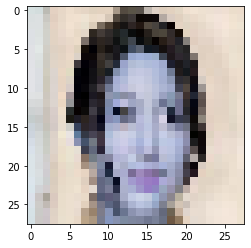

In [26]:
import  cv2
import  os 
import  numpy  as np
import matplotlib.pyplot as plt

path = "/Users/LeeJunhyeok/Documents/a"
file_list = os.listdir(path)

for k in file_list:
    img = cv2.imread(path + '/' + k)
    width, height = img.shape[:2]
    resize_img = cv2.resize(img, (28 , 28), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('/Users/LeeJunhyeok/Documents/a' + k, resize_img)    

plt.imshow(resize_img)
plt.show()    

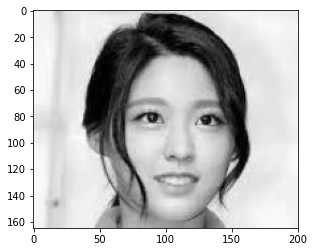

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

j= '/Users/LeeJunhyeok/Documents/a/a.jpg'
img = mpimg.imread(j)
gray = rgb2gray(img)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

편미분을 하는 gredient_decent 함수를 이용해서 2층 신경망을 구현

<br>

저자가 만들어온 소스 코드 내에 common이라는 폴더가 있습니다  
이 common 폴더를 주피터 워킹 디렉토리에 가져다 둡니다  
  
<br>

기존에 있었던 common.py는 common7.py로 이름을 변경하시오  
common 폴더(패키지)안에 functions.py도 있고 gradient.py도 있다

- functions.py: 신경망에 필요한 함수들  
- gradient.py: 편미분하는 함수 numerical_gradient 함수

2층 신경망 만들기

In [28]:
import sys, os
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

sys.path.append(os.path) # 부모 디렉토리의 파일들을 가져올 수 있도록 설정

z = np.array([0.1, 0.9])
print(softmax(z))

ModuleNotFoundError: No module named 'common.functions'; 'common' is not a package

In [ ]:
# 예제1. 가중치 행렬을 2x3으로 랜덤으로 숫자를 생성해서 만들기
import numpy as np
print( np.random.randn(2,3))

In [ ]:
# 예제2. 아래의 입력 데이터를 1x2행렬로 만들고 위에서 만든 가중치 행렬과 내적하시오

x = np.array([0.6, 0.9]) # 설현사진
W = np.random.randn(2,3)

print(np.dot(x,W))

In [ ]:
# 예제3. 설현사진을 가중치 행렬과 내적해서 나온 결과 행렬을 softmax 함수에 넣어서 확률을 출력하시오

x = np.array([0.6, 0.9]) # 설현사진
W = np.random.randn(2,3)

z = np.dot(x,W) # 내적한 결과
y = softmax(z)
y  # [0.65961989(아이린), 0.30940272(설현), 0.03097739(아이유)] 확률이 일치하지 않음

In [ ]:
# 예제4. 위에 출력된 확률 벡터를 정답과 함께 오차함수에 넣어서 오차를 구해보기
x = np.array([0.6, 0.9]) # 설현사진
np.random.seed(1)
W = np.random.randn(2,3)

t = np.array([0,1,0]) # 두번째가 1이면 설현사진(정답)
z = np.dot(x, W)
y = softmax(z)
loss = cross_entropy_error(y, t)
print(loss)

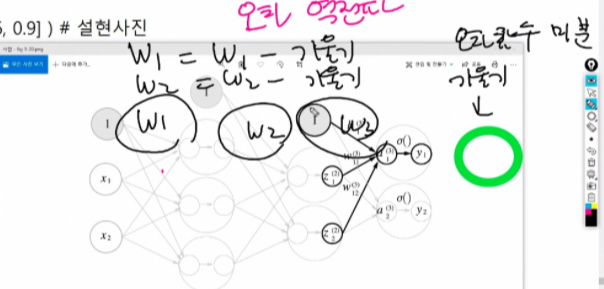

<br>

예제5. 비용함수를 생성해서 비용함수를 미분하시오

In [ ]:
f = lambda w: net.loss(x, t) # 비용함수 생성
dW = numerical_gradient(f, net.W)
dW

In [ ]:
# 예제 6. 2층 신경망 전체 코드를 구현
import sys, os
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

sys.path.append(os.path) # 부모 디렉토리의 파일들을 가져올 수 있도록 설정

class SimpleNet:
    def __init__(self):   # 설계도(클래스)로 제품(객체)를 만들때 바로 실행되는 함수
        self.W = np.random.randn(2,3)   # 랜덤으로 가중치 행렬을 생성
        
    def predict(self, x):  # 설현사진을 입력해서 예측하는 함수
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)  # 설현 사진을 넣어서 z 값 출력
        y = softmax(z)  # z값을 받아서 확률벡터를 출력
        loss = cross_entropy_error(y, t)  # 확률벡터와 정답을 넣어서 오차를 출력
        return loss
 
x =np.array([0.6, 0.9]) # 설현 사진
t = np.array([0,0,1]) # [아이린, 설현, 아이유] 

net = SimpleNet() # 클래스(2층 신경망 설계도)로 객체(제품)을 생성

f = lambda w: net.loss(x, t) # 비용함수 생성
dW = numerical_gradient( f, net.W )
dW

[ 0.28292283,  0.29350464, -0.57642747],  
[ 0.42438424,  0.44025696, -0.8646412 ]  

가중치가 2x3행렬이니깐 기울기도 2x3행렬로 나와야 가중치에서 기울기를 뺄수 있다.  
가중치 = 가중치 - 기울기

In [ ]:
net.W

딥러닝 책 내용  
1장 numpy 사용법: 신경마엥서 예측하는 모든 수학식이 행렬계산이여서 numpy가 행렬연산을 고속으로 처리하는 모듈  
2장 퍼셉트론: 인공신경망의 원리 --> 가중치를 갱신해서 작업  
3장 3층 신경망 구현: 필기체 데이터를 분류하는 인공신경망을 3층으로 생성  
                 (저자가 필기체 6만장을 학습 다 시킨 가중치를 만들어와서 제공해줘서 피클파일을 불러와서 3층 신경망으로 구성)  
                 우리는 필기체 데이터 대신 설현사진을 3층 신경망(필기체를 공부한 신경망)을 넣어서 '3', '8'과 같은 결과값을 리턴
4장 2층 신경망 구현 ( 데이터를 학습을 시켜야 함 )
    1. 오차함수
    2. 미니배치
    3. 수치미분 ---> 오차함수를 미분해서 기울기를 구하려고  
    
입력값 ----> 2층 신경망 ----> 기울기
            1. __init__함수: 가중치 행렬을 생성
            2. predict 함수: 입력값을 받아서 가중치 행렬과 내적한 결과를 출력
            3. Loss 함수: 오차를 출력

문제 83. 아래의 입력 데이터와 target(정답)을 simplenet에 입력하고 오차를 출력하시오

In [ ]:
x = np.array([0.8, 0.2])
t = np.array([0,0,1])

net = SimpleNet()
print(net.loss(x, t))

문제 84. SimpleNet() 클래스에 있는 가중치 행렬 W을 출력하시오

In [ ]:
net = SimpleNet()
print(net.W)

문제 85. SimpleNet() 클래스에 있는 predcit 함수에 아래 입력 데이터를 넣고 결과를 출력하시오  
x = np.array([0.9, 0.6])  

In [29]:
x = np.array([0.9, 0.6])
net.predict(x)

NameError: name 'net' is not defined

필기체 데이터를 학습시키는 2층 신경망 전체 full 코드

In [30]:
""" 1. 필요한 신경망 구현 라이브러리를 가져오는 코드 """
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
"""2. 2층 신경망을 구현하는 클래스 생성 코드"""
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        """3. 가중치 행렬 생성하는 코드
        3-1. 2층 신경망에는 가중치 행렬이 몇개가 필요할까? 2개"""
        self.params = {} # 가중치 초기화
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
                                                              # 784        50 (mnist 데이터 셋 크기)
        self.params['b1'] = np.zeros(hidden_size) # 50
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
                                                               #     50  ,    10  (필기체 10개를 맞추겠다.)
        self.params['b2'] = np.zeros(output_size) # 10

    def predict(self, x):
        """ 4. 입력값을 받아서 가중치 행렬과 내적하고 바이어스를 더해서 
        나온 행렬을 소프트 맥스 함수를 넣어서 확률벡터를 출력하는함수"""
        W1, W2 = self.params['W1'], self.params['W2'] 
        b1, b2 = self.params['b1'], self.params['b2'] 
    
        a1 = np.dot(x, W1) + b1    # 1층 구현
        z1 = sigmoid(a1)   # 시그모이드 함수 통과
        a2 = np.dot(z1, W2) + b2   # 2층 구현
        y = softmax(a2)    # 소프트맥스 함수 통과
        
        return y   # [0.1, 0.1, 0.1, 0.3, 0.1, 0.05, 0.05, 0.05, 0.05] 확률값 리턴
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


IndentationError: expected an indented block (<ipython-input-30-9a5babb8ed36>, line 9)

문제 86. 오늘 만든 SimpleNet 클래스를 객체화시켜서 실행하는데 이 신경망에 설현사진을 입력할 수 있도록 가중치 행렬의 shape를 수정하고 설현사진을 입력해서 확률벡터를 출력하시오 ( 설현사진을 28 x 28로 resize 해서 넣으시오 )

In [31]:
import  sys, os
sys.path.append(os.pardir)  # 부모디렉토리의 파일들을 가져올 수 있도록 설정
import  numpy  as  np
from  common.functions  import  softmax, cross_entropy_error 
from  common.gradient   import  numerical_gradient 

class  simpleNet:
    def  __init__(self):  # 설계도(클래스)로 제품(객체)을 만들때 바로 실행되는 함수
        self.W = np.random.randn(784,3)  # 랜덤으로 가중치 행렬을 생성

    def  predict(self, x):  #  설현 사진 입력해서 예측하는 함수 
        return  np.dot( x, self.W)  

    def  loss(self, x, t):
        z = self.predict(x)  # 설현 사진을 넣어서 z 값을 출력
        y = softmax(z)  # z 값 받아서 확률백터를 출력 
        loss = cross_entropy_error(y, t) #  확률벡터와 정답을 넣어서 오차를 출력
        return  loss 

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

j= '/Users/LeeJunhyeok/Documents/a/a.jpg'
img = mpimg.imread(j)
gray = rgb2gray(img)

width, height = gray.shape[:2]
resize_img = cv2.resize(gray, (28 , 28), interpolation=cv2.INTER_CUBIC)

net = simpleNet()
#result = net.predict(gray)
resize_img.shape

ModuleNotFoundError: No module named 'common.functions'; 'common' is not a package

2층 신경망을 생성

In [32]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        """1. 가중치 행렬 (W1, W2), 편향( b1, b2)를 구성함
           __init__함수는 초기화 값으로 클래스를 생성할 때 무조건 실행되는 함수다."""
        self.params = {}   # 가중치 초기화
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
                                                                 # 784,      50
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
                                                                 # 50,       10
        self.params['b2'] = np.zeros(output_size)
        print("신경망이 생성되었습니다.") 
       
#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#print('모든 가중치 행렬이 가지고 있는 params 딕셔너리의 키를 확인: ',network.params.keys(),'\n')
#print('W1의 가중치 행렬을 확인: ',network.params['W1'],'\n')
#print('W1의 가중치 행렬의 shape: ',network.params['W1'].shape,'\n')
#print('W2의 가중치 행렬의 shape: ',network.params['W2'].shape,'\n')
#print('b1 행렬의 shape: ',network.params['b1'].shape,'\n')
#print('b2 행렬의 shape: ',network.params['b2'].shape,'\n')

    def predict(self, x):
        """2. 입력데이터(필기체)를 넣고 1층과 2층을 거쳐서 확률벡터를 출력하는 함수"""
        W1, W2 = self.params['W1'], self.params['W2']   # 가중치를 불러오는 코드
        b1, b2 = self.params['b1'], self.params['b2']   # 바이어스 불러오는 코드
    
        a1 = np.dot(x, W1) + b1  # 1층 구성
        z1 = sigmoid(a1)         # 1층 시그모이드 함수
        a2 = np.dot(z1, W2) + b2 # 2층 구성
        y = softmax(a2)          # 2층이 출력층이라 소프트맥스 함수
        
        return y

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) # mnist 필기체 데이터를 불러온다
#network.predict(x_train).shape

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        """3. 비용(에러, 오차)를 출력하는 함수"""
        y = self.predict(x)
        
        return cross_entropy_error(y, t) # 평균 오차의 값을 리턴함(오차는 하나임)

# network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
# (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) # mnist 필기체 데이터를 불러온다
# network.loss(x_train[100], t_train[100])
    
    def accuracy(self, x, t):
        """4. 정확도를 출력하는 함수"""
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
# network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
# (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) # mnist 필기체 데이터를 불러온다
# network.accuracy(x_train[:100], t_train[:100]) # 모든 열과 100개까지의 행만 넣기 위함

        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        """5. 편미분해서 기울기를 출력하는 함수(4개의 기울기를 출력(w1, b1, w2, b2))"""
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

# 문제 87. TwoLayerNet 클래스를 객체화시켜서 numerical_gradient 함수를 실행해서 기울기를 출력하시오 ( 입력데이터를 100개만 입력하시오 )
# network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
# (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) # mnist 필기체 데이터를 불러온다
# network.numerical_gradient(x_train[:100], t_train[:100]) # 모든 열과 100개까지의 행만 넣기 위함


    def gradient(self, x, t):
        """6. 위의 수치미분은 너무 느려서 5장에 배울 오차 역전파를 써서 가중치를 구해줘야 함
           이 방법이 학습이 더 빠름"""
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True) # mnist 필기체 데이터를 불러온다
network.gradient(x_train[:100], t_train[:100]) # 모든 열과 100개까지의 행만 넣기 위함

ModuleNotFoundError: No module named 'common.functions'; 'common' is not a package

2층 신경망 클래스를 가지고 학습시키는 코드

In [33]:
# 이 코드는 위에서 만든 클래스를 객체화 시키고 필기체 데이터를 불러와서 
# 객체화 시킨 신경망에 100개씩 입력해서 학습시키는 코드

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt  # 정확도를 시각화하기 위해 필요
from dataset.mnist import load_mnist # 필기체 데이터를 불러오는 코드
#from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 6000  # 반복 횟수를 적절히 설정한다. 10에폭 돌게 설정
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기 (100페이지씩 보겠다.)
learning_rate = 0.1 # 학습률

train_loss_list = [] # 오차를 담을 리스트 (시각화를 위해서 데이터를 저장)
train_acc_list = []  # 훈련 데이터의 정확도를 담을 리스트 (시각화를 위해서 데이터를 저장 )
test_acc_list = []   # 테스트 데이터의 정확도를 담을 리스트 ( 시각화를 위해서 데이터를 저장 )

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1) # 60000 / 100 = 600

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size) # 100개의 숫자를 랜덤 추출
    x_batch = x_train[batch_mask] # 훈련데이터 100개
    t_batch = t_train[batch_mask] # 훈련데이터의 정답 100개
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 기울기 100개를 구한다
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'): # 가중치와 바이어스를 갱신
        network.params[key] -= learning_rate * grad[key] 
    
    
    
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch) # 오차를 담는다. 밑에서 사용하지는 않는다.
    train_loss_list.append(loss) 
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


NameError: name 'TwoLayerNet' is not defined

문제 88. 10 에폭이 아니라 20 에폭이 돌게 코드를 수정하고 돌겨 시각화된 그래프를 첨부하시오

In [ ]:
# 이 코드는 위에서 만든 클래스를 객체화 시키고 필기체 데이터를 불러와서 
# 객체화 시킨 신경망에 100개씩 입력해서 학습시키는 코드

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt  # 정확도를 시각화하기 위해 필요
from dataset.mnist import load_mnist # 필기체 데이터를 불러오는 코드
#from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 12000  # 반복 횟수를 적절히 설정한다. 10에폭 돌게 설정
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기 (100페이지씩 보겠다.)
learning_rate = 0.1 # 학습률

train_loss_list = [] # 오차를 담을 리스트 (시각화를 위해서 데이터를 저장)
train_acc_list = []  # 훈련 데이터의 정확도를 담을 리스트 (시각화를 위해서 데이터를 저장 )
test_acc_list = []   # 테스트 데이터의 정확도를 담을 리스트 ( 시각화를 위해서 데이터를 저장 )

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1) # 60000 / 100 = 600

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size) # 100개의 숫자를 랜덤 추출
    x_batch = x_train[batch_mask] # 훈련데이터 100개
    t_batch = t_train[batch_mask] # 훈련데이터의 정답 100개
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 기울기 100개를 구한다
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'): # 가중치와 바이어스를 갱신
        network.params[key] -= learning_rate * grad[key] 
    
    
    
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch) # 오차를 담는다. 밑에서 사용하지는 않는다.
    train_loss_list.append(loss) 
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [ ]:
# 예제 1. pickle 파일을 생성하는 예제
import pickle
params = [3.1, 4.3, 5.3] # 가중치
with open("weightp.pkl", "wb") as f:
    pickle.dump(params)

In [ ]:
# 문제 89. 4장에서 만든 2층 신경망의 가중치와 편향을 pickle 파일로 내리시오
import pickle
with open('mnist_weight.pkl', 'wb') as f:
    pickle.dump(network.params, f)

In [34]:
# 문제 90. 3장에서 사용한 3층 신경망 코드를 2층 신경망으로 변경하고 
# 위의 pickle파일을 셋팅해서 필기체를 분류할 수 있는 신경망을 만드시오


import  pickle

def  init_network():
    with  open("mnist_weight.pkl", "rb")  as  f:
        network = pickle.load(f)
    return  network 

network = init_network()
print (network.keys() ) 
print ( network['W1'].shape)  # 2교시 신호 보냈습니다. 
print ( network['W2'].shape)  # (    ,    )   은닉2층의 노드수

dict_keys(['W1', 'b1', 'W2', 'b2'])
(784, 50)
(50, 10)


In [35]:
import numpy as np
from common import *
from  dataset.mnist  import  load_mnist 

# 1. 데이터를 불러옵니다. 
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True,  one_hot_label=False) 

# 2. 가중치와 바이어스 값을 불러옵니다. (저자가 미리 학습 시킨 가중치와 바이어스)
network = init_network()
w1, w2 = network['W1'], network['W2']
b1, b2 = network['b1'], network['b2']

# 3. 신경망을 구성합니다. 
# 0층
x = x_train[0:100]  # 일단 10개의 필기체 데이터를 구성합니다. 

# 1층
y = np.dot(x,w1) + b1
y_hat = sigmoid(y)

# 2층
z = np.dot(y_hat, w2) + b2
z_hat = sigmoid(z)
a = np.argmax(z_hat, axis=1)     # axis =1 이 축  # 예측값
b = t_train[0:100]   # 실제 정답 

print('총 ',len(a), '중에서 ', sum(a==b),'개 맞추었습니다')

총  100 중에서  0 개 맞추었습니다


# 4장 요약정리
1. 신경망을 학습되게 하려면 필요한것이 무엇인가
    1-1. 오차함수(항등함수, 교차엔트로피)  
    1-2. 수치미분  
    1-3. 미니배치  
2. 미분함수를 파이썬으로 구현  
3. 편미분 함수를 파이썬으로 구현  
4. 2층 신경망을 구현( 학습할 수 있는 신경망)
5. 신경망의 가중치를 pickle파일로 내림